In [28]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

232


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,adeef57e52d2151538b028e975d5f9b6d5d197a2,woven-salp,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
1,fea39a952605f42eb1fafacded2c761c06eab85e,gutsy-vine,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/original.txt,cq.txt,semi/cot-original.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
2,5c32d10fbd52954c8ad351010a14273e3c2fce1b,erect-furl,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
3,81514878020b22218c57033edd34039c5d326619,sewed-limb,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,semi/cot.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
4,667fbccdb702e97d387190d4cc16bd90f5d55da0,azoic-noma,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct


In [30]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [31]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,bluff-wire,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.003333,0.004167,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
1,lumpy-amyl,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.073333,0.096485,0.17,...,65.0,273.0,25.56044,104.049678,0.0,8.0,16.0,25.0,1696.0,ccot
2,tutti-loft,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.013333,0.016667,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
3,fetal-toke,0.7,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
4,smoky-weld,0.7,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,2,0.123333,0.152595,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot


In [32]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run
0,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,0.1,"(1,)"
1,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,0.5,"(1, 2)"
2,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,0.7,"(1, 2)"
3,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1.0,"(1, 2)"
4,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1.5,"(1, 2)"
...,...,...,...,...,...,...,...
115,direct,direct/format-few.txt,cq.txt,semi/direct.json,3,0.1,"(1, 2)"
116,direct,direct/format-few.txt,cq.txt,semi/direct.json,3,0.5,"(1, 2)"
117,direct,direct/format-few.txt,cq.txt,semi/direct.json,3,0.7,"(1, 2)"
118,direct,direct/format-few.txt,cq.txt,semi/direct.json,3,1.0,"(1, 2)"


In [33]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [34]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'ccot/original', 'cot/format-thought',
       'cot/original', 'cte/format-triplets-few', 'direct/format-few'],
      dtype=object)

In [35]:
df = df[df['params.run']==2]

In [36]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,ccot,ccot/format-thought,cq,semi/ccot,0,0.5,0.013333,0.016667,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ccot,ccot/format-thought,cq,semi/ccot,0,0.7,0.123333,0.152595,0.13,0.146302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ccot,ccot/format-thought,cq,semi/ccot,0,1.0,0.003333,0.003333,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ccot,ccot/format-thought,cq,semi/ccot,0,1.5,0.003333,0.003333,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,0.003333,0.003333,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
94,direct,direct/format-few,cq,semi/direct,0,0.5,0.536667,0.657229,0.65,0.770214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,cte,cte/format-triplets-few,cq,semi/cte,3,0.1,0.580000,0.639678,0.77,0.842073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,ccot,ccot/original,cq,semi/ccot-original,3,0.7,0.410000,0.474573,0.69,0.791457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,cot,cot/original,cq,semi/cot-original,0,0.7,0.006667,0.015895,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizations

In [38]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [39]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [40]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
2,ccot,ccot/format-thought,cq,semi/ccot,0,0.5,2,0.013333,0.016667,ccot/format-thought | cq | 0
4,ccot,ccot/format-thought,cq,semi/ccot,0,0.7,2,0.123333,0.152595,ccot/format-thought | cq | 0
6,ccot,ccot/format-thought,cq,semi/ccot,0,1.0,2,0.003333,0.003333,ccot/format-thought | cq | 0
8,ccot,ccot/format-thought,cq,semi/ccot,0,1.5,2,0.003333,0.003333,ccot/format-thought | cq | 0
10,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,2,0.003333,0.003333,ccot/format-thought | cq | 1
...,...,...,...,...,...,...,...,...,...,...
223,direct,direct/format-few,cq,semi/direct,3,0.1,2,0.003333,0.003333,direct/format-few | cq | 3
225,direct,direct/format-few,cq,semi/direct,3,0.5,2,0.003333,0.003333,direct/format-few | cq | 3
227,direct,direct/format-few,cq,semi/direct,3,0.7,2,0.063333,0.072579,direct/format-few | cq | 3
229,direct,direct/format-few,cq,semi/direct,3,1.0,2,0.013333,0.016606,direct/format-few | cq | 3


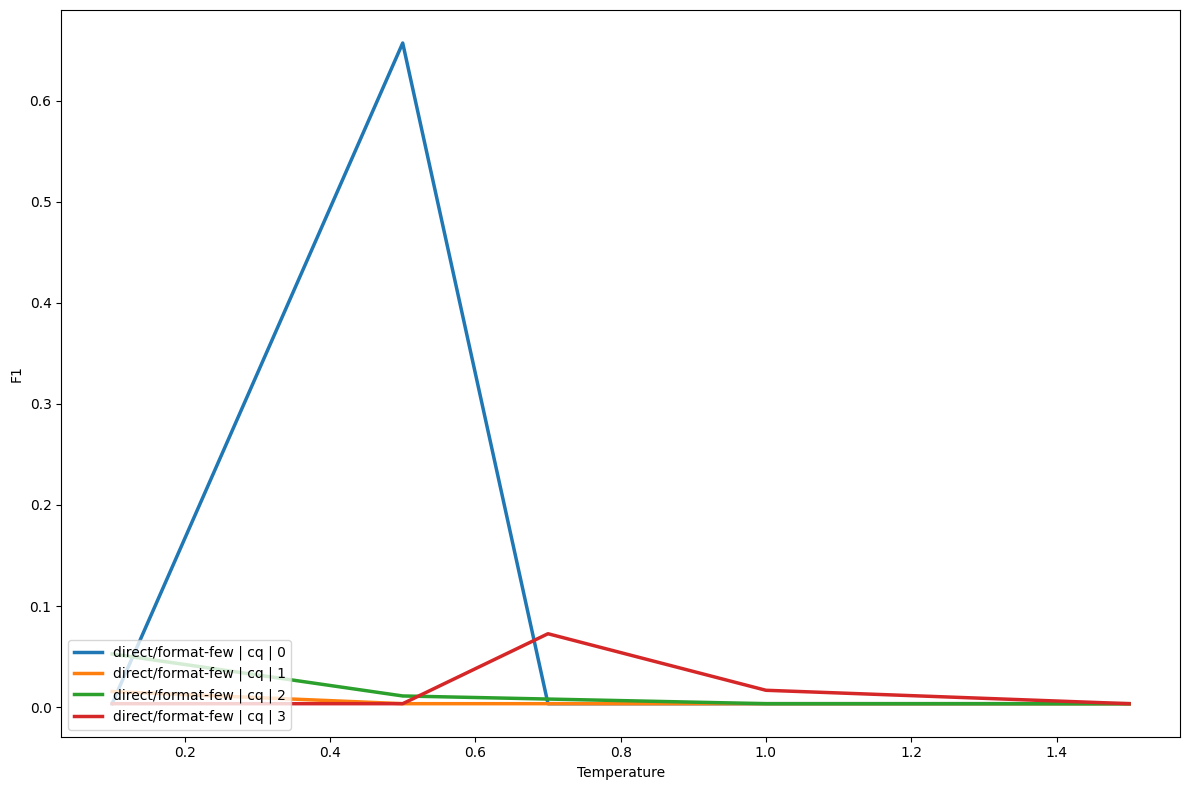

In [41]:
plot_variance(prepared_df, technique='direct', legend='brief')

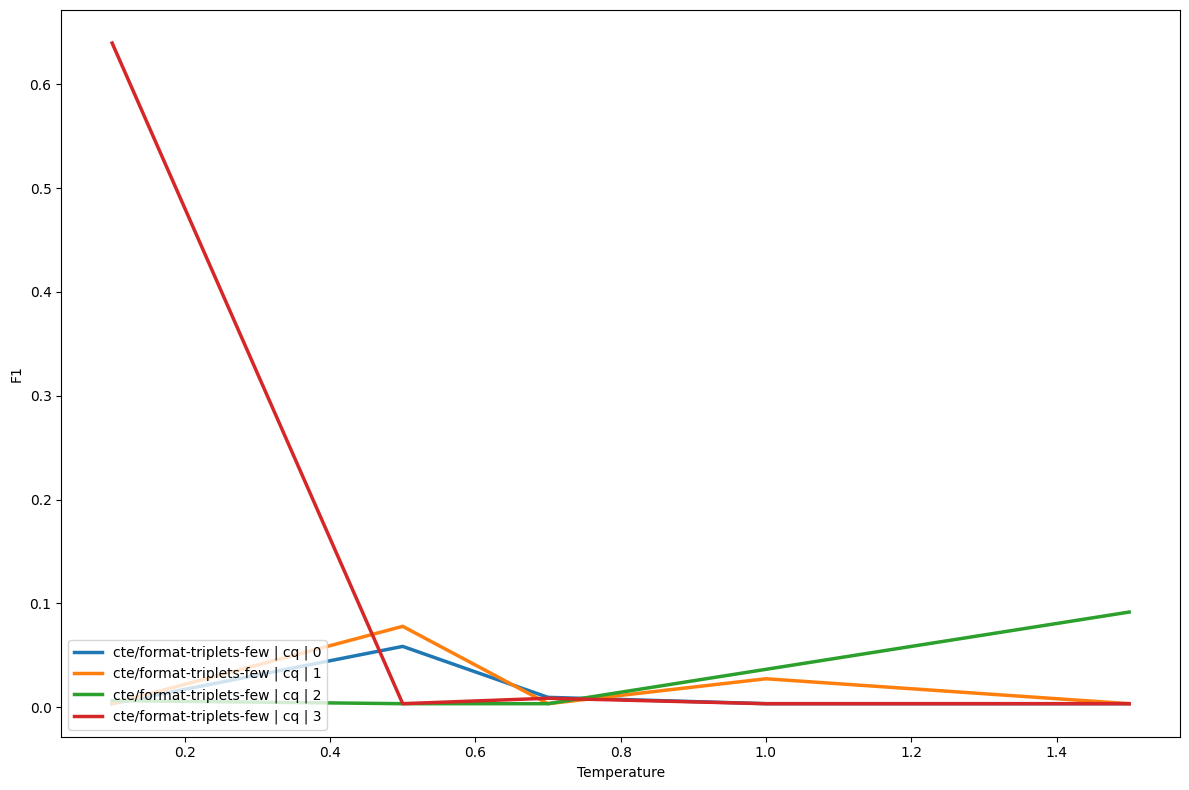

In [42]:
plot_variance(prepared_df, technique='cte', legend='brief')

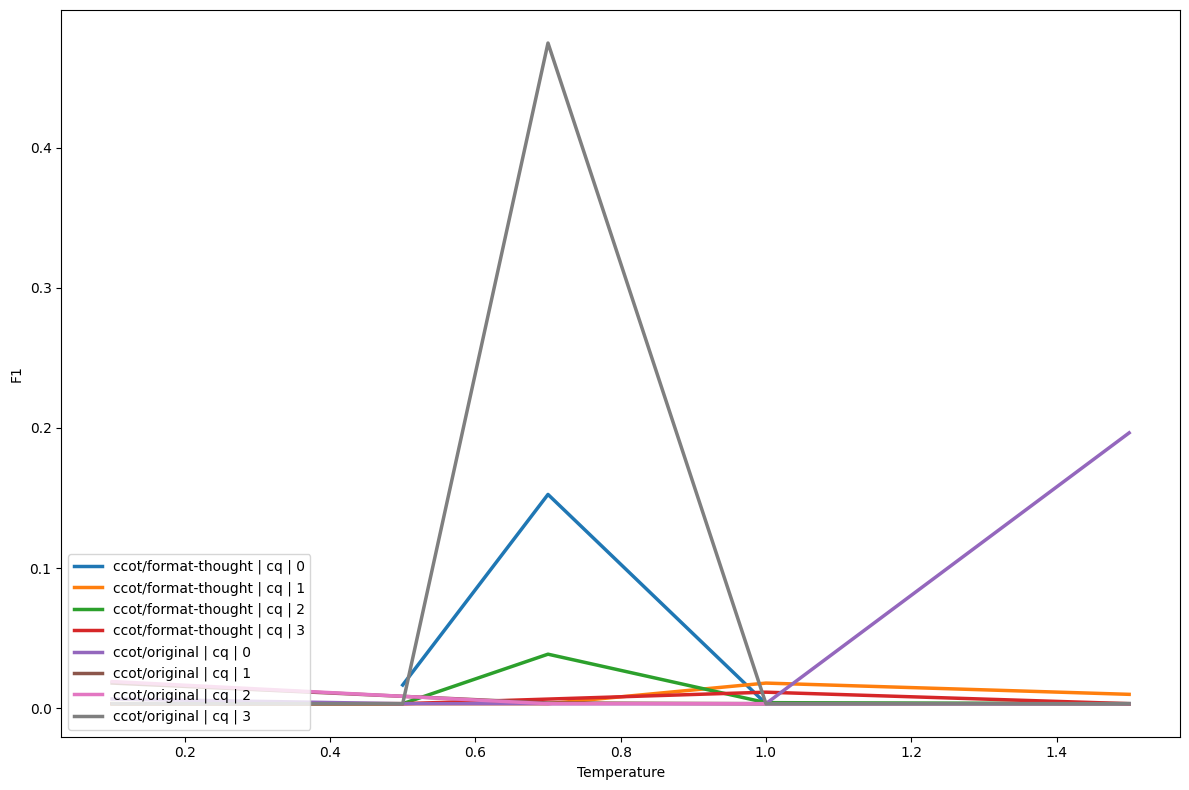

In [43]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [44]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
67,ccot,ccot/original,cq,semi/ccot-original,3,0.1,2,0.003333,0.003333,ccot/original | cq | 3
69,ccot,ccot/original,cq,semi/ccot-original,3,0.5,2,0.003333,0.003333,ccot/original | cq | 3
71,ccot,ccot/original,cq,semi/ccot-original,3,0.7,2,0.410000,0.474573,ccot/original | cq | 3
73,ccot,ccot/original,cq,semi/ccot-original,3,1.0,2,0.003333,0.003333,ccot/original | cq | 3
75,ccot,ccot/original,cq,semi/ccot-original,3,1.5,2,0.003333,0.003333,ccot/original | cq | 3
115,cot,cot/original,cq,semi/cot-original,0,0.1,2,0.003333,0.003939,cot/original | cq | 0
117,cot,cot/original,cq,semi/cot-original,0,0.5,2,0.003333,0.003333,cot/original | cq | 0
119,cot,cot/original,cq,semi/cot-original,0,0.7,2,0.006667,0.015895,cot/original | cq | 0
121,cot,cot/original,cq,semi/cot-original,0,1.0,2,0.003333,0.005000,cot/original | cq | 0
123,cot,cot/original,cq,semi/cot-original,0,1.5,2,0.003333,0.003333,cot/original | cq | 0


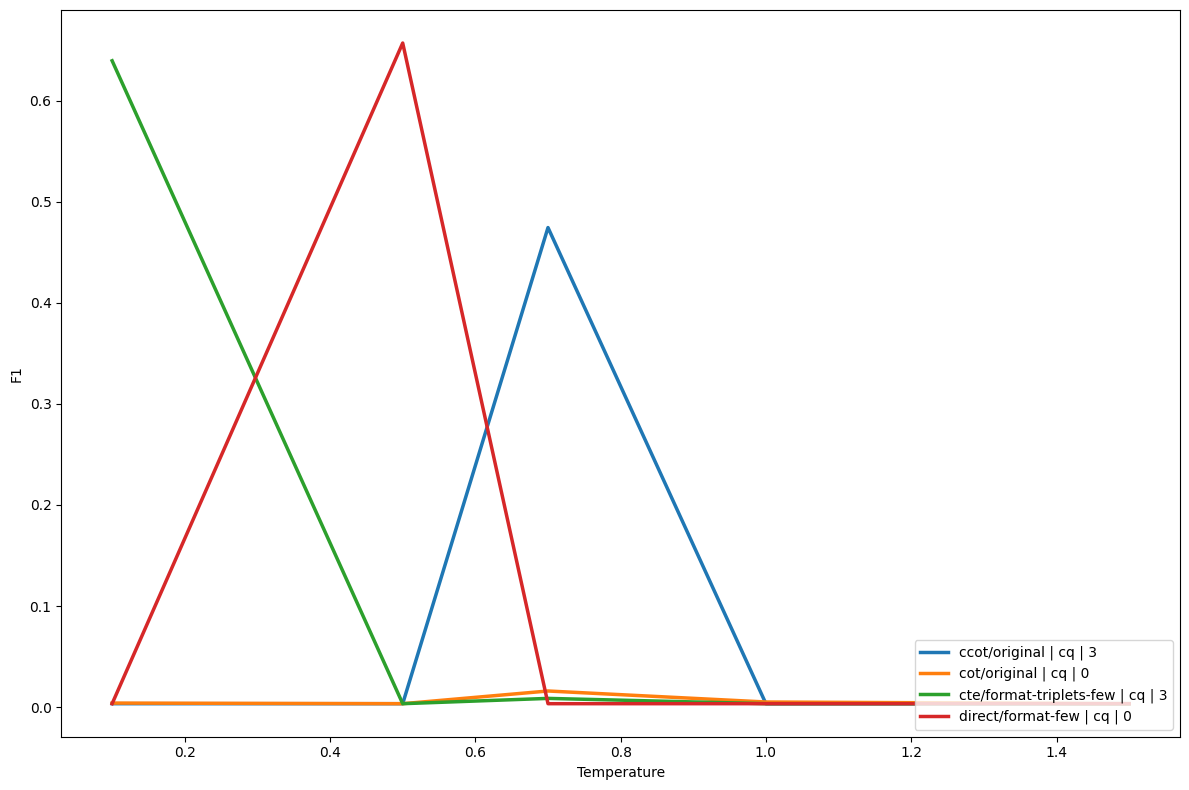

In [45]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

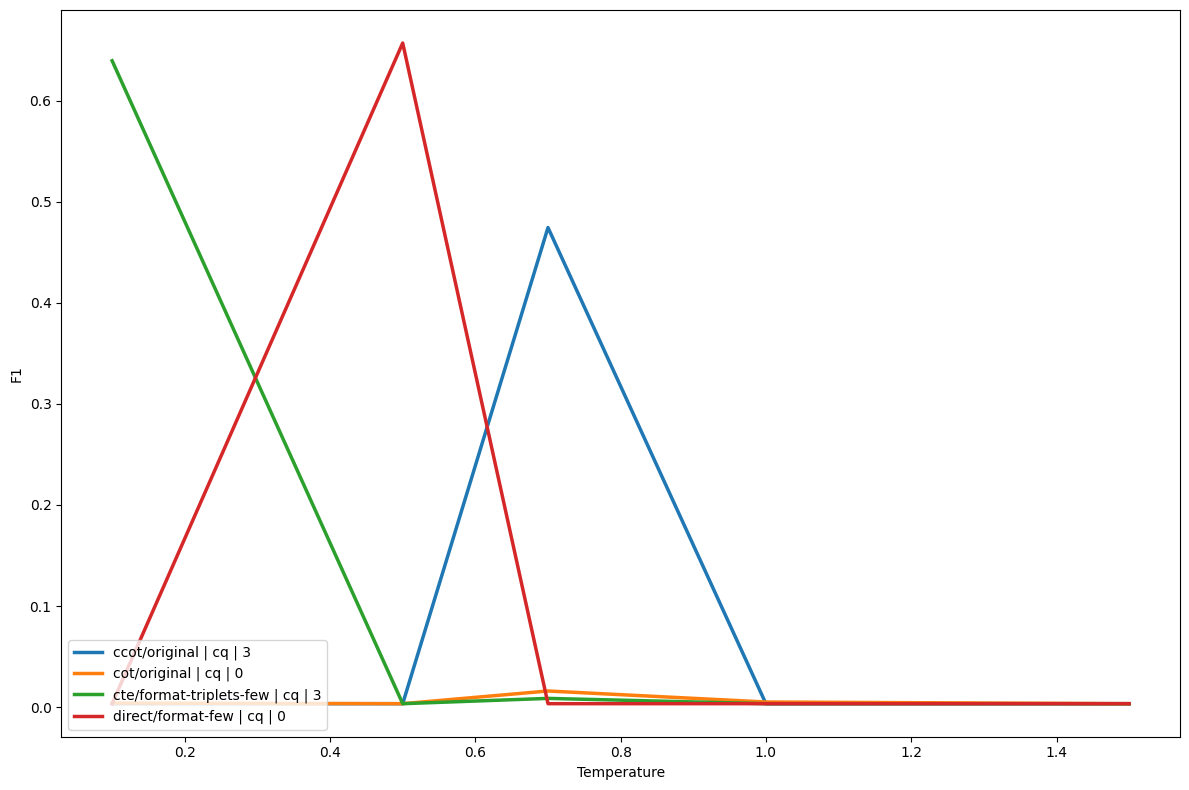

In [46]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

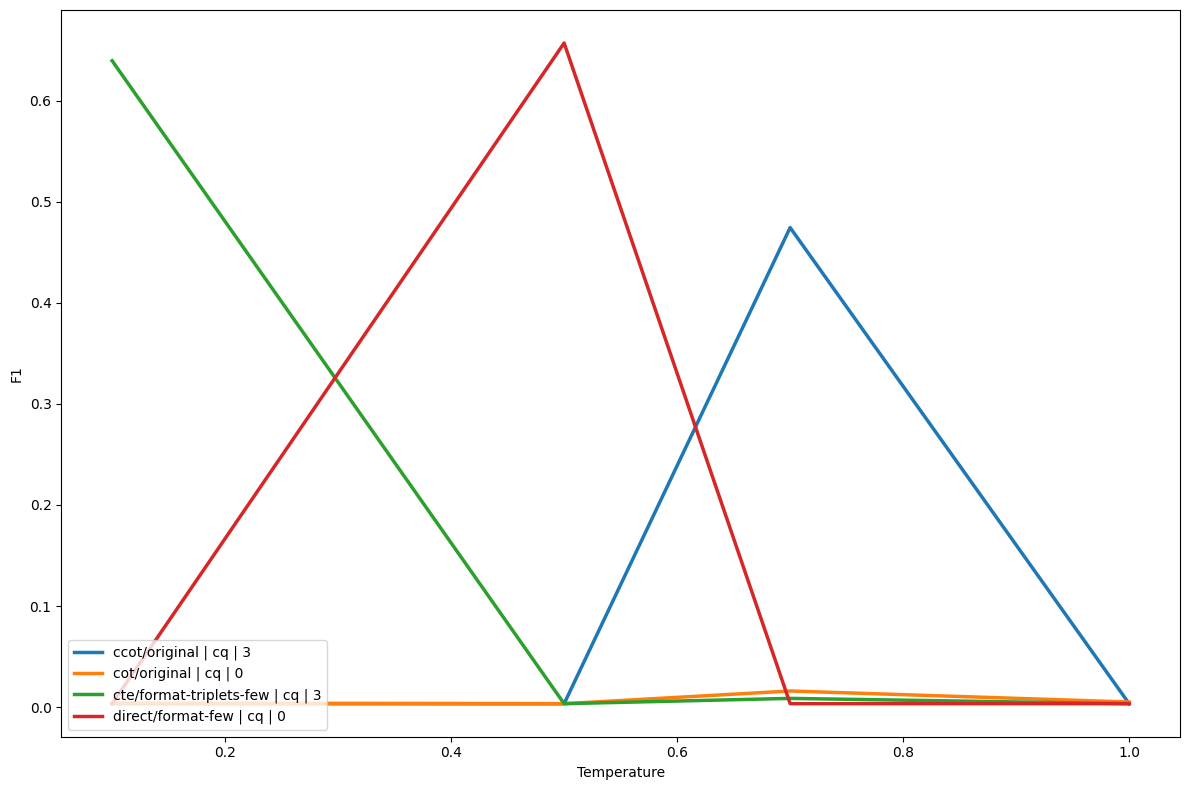

In [47]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

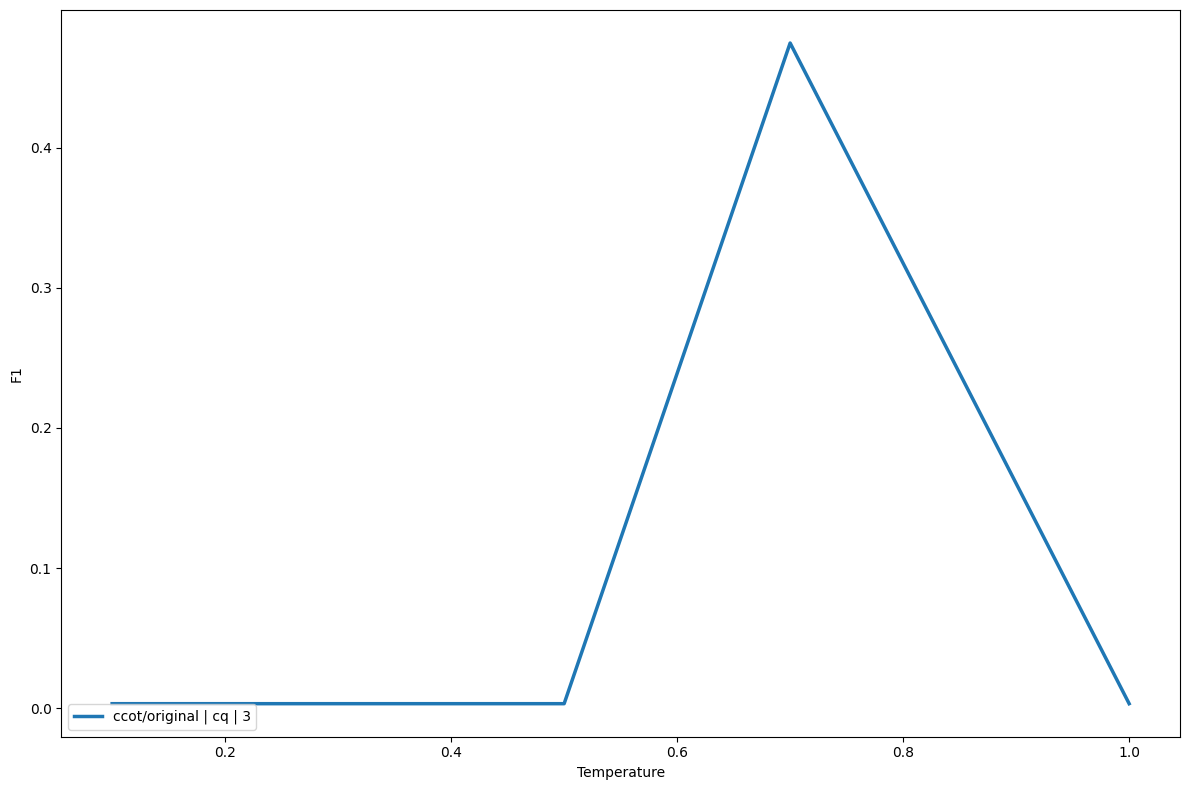

In [48]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

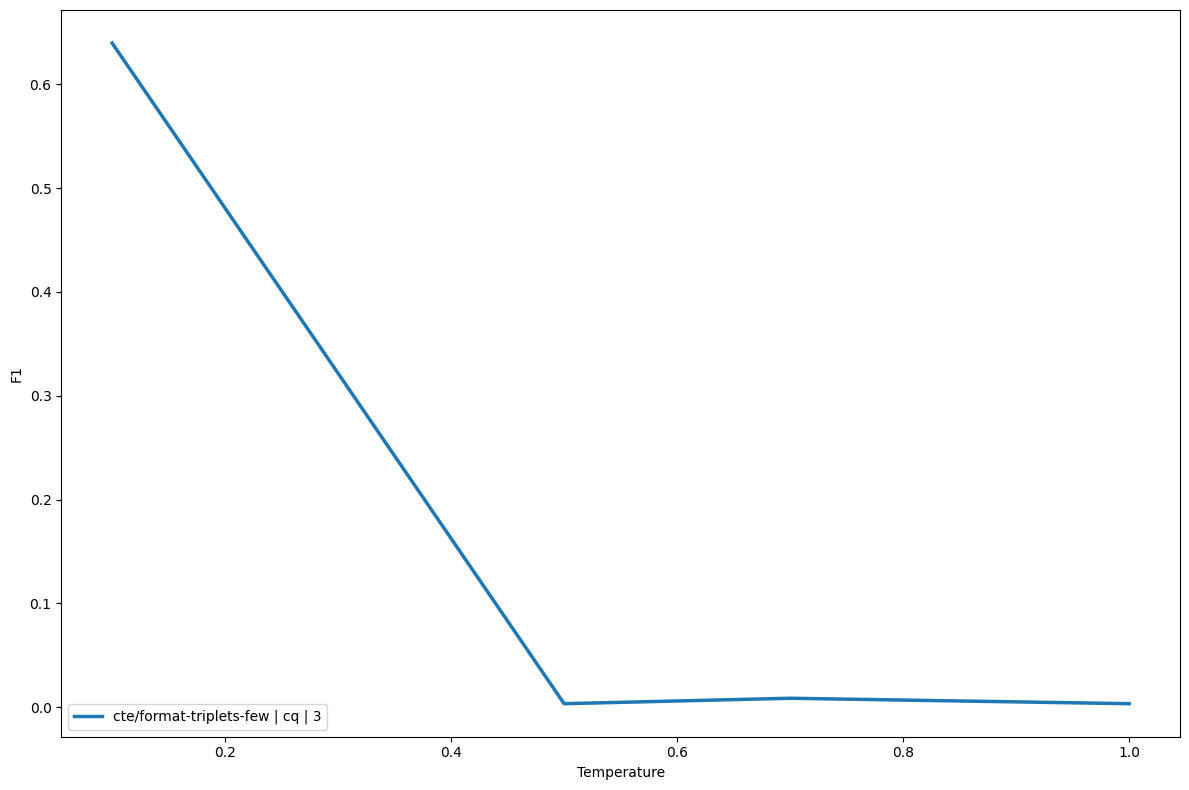

In [49]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [50]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

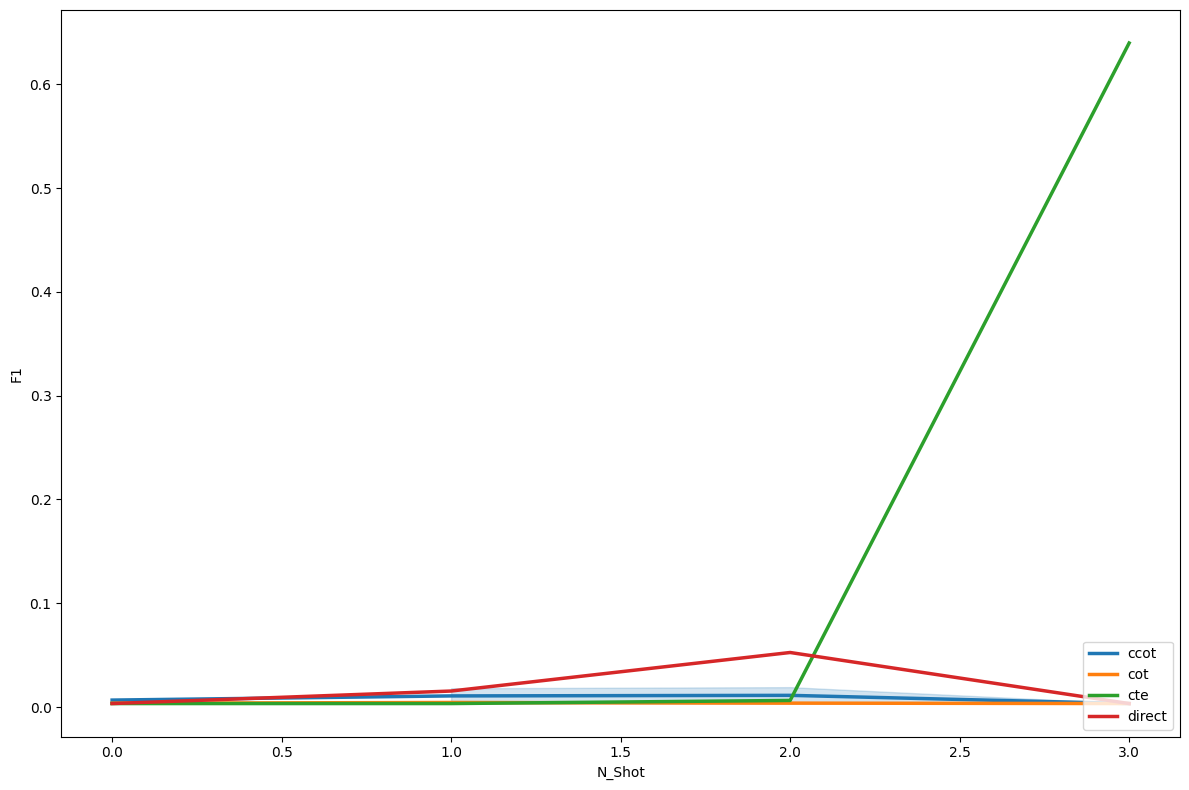

In [51]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

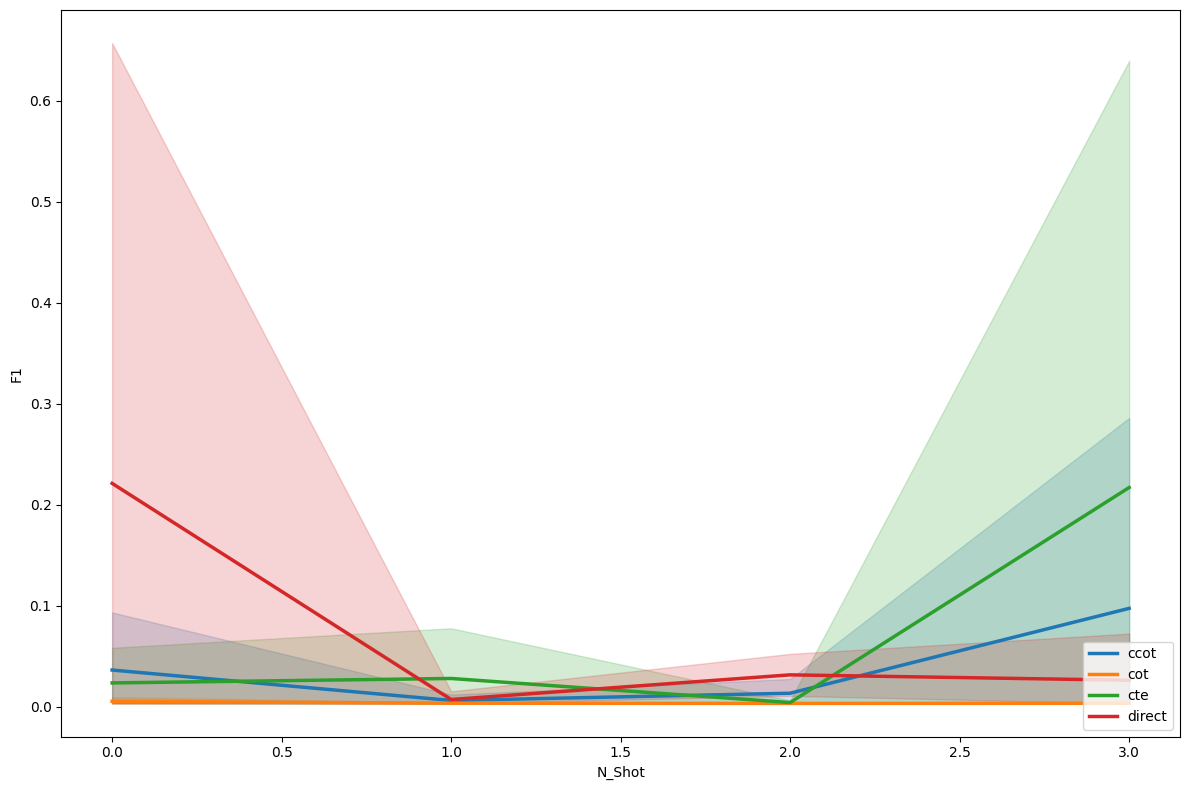

In [52]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [53]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
2,tutti-loft,0.5,ccot/format-thought,cq,semi/ccot,0,2,0.013333,0.016667,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
4,smoky-weld,0.7,ccot/format-thought,cq,semi/ccot,0,2,0.123333,0.152595,0.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
6,grapy-zags,1.0,ccot/format-thought,cq,semi/ccot,0,2,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
8,hyoid-zips,1.5,ccot/format-thought,cq,semi/ccot,0,2,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
10,hefty-hate,0.1,ccot/format-thought,cq,semi/ccot,1,2,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,lucky-eric,0.1,direct/format-few,cq,semi/direct,3,2,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
225,pudgy-gyms,0.5,direct/format-few,cq,semi/direct,3,2,0.003333,0.003333,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
227,perdu-sike,0.7,direct/format-few,cq,semi/direct,3,2,0.063333,0.072579,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
229,bushy-azan,1.0,direct/format-few,cq,semi/direct,3,2,0.013333,0.016606,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct


In [54]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
184,dazed-abbs,0.1,cte/format-triplets-few,cq,semi/cte,3,2,0.580000,0.639678,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cte
214,tacit-quay,0.1,direct/format-few,cq,semi/direct,2,2,0.033333,0.052524,0.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
58,choky-junk,0.1,ccot/original,cq,semi/ccot-original,2,2,0.013333,0.019136,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
49,gutta-tuns,0.1,ccot/original,cq,semi/ccot-original,1,2,0.013333,0.018056,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
204,scaly-saut,0.1,direct/format-few,cq,semi/direct,1,2,0.000000,0.015389,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
39,above-suss,0.1,ccot/original,cq,semi/ccot-original,0,2,0.006667,0.006667,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ccot
175,loved-sima,0.1,cte/format-triplets-few,cq,semi/cte,2,2,0.003333,0.006329,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cte
87,focal-drab,0.1,cot/format-thought,cq,semi/cot,1,2,0.003333,0.005421,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
135,strip-tics,0.1,cot/original,cq,semi/cot-original,2,2,0.003333,0.004167,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
115,rabic-seal,0.1,cot/original,cq,semi/cot-original,0,2,0.003333,0.003939,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
